Task 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-1-17c2768c8f3a>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_preprocessed[column] = lbl_encoder.fit_transform(train_data_preprocessed[column])
<ipython-input-1-17c2768c8f3a>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_preprocessed[column] = lbl_encoder.fit_transform(train_data_preprocessed[column])
<ipython-input-1-17c2768c8f3a>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

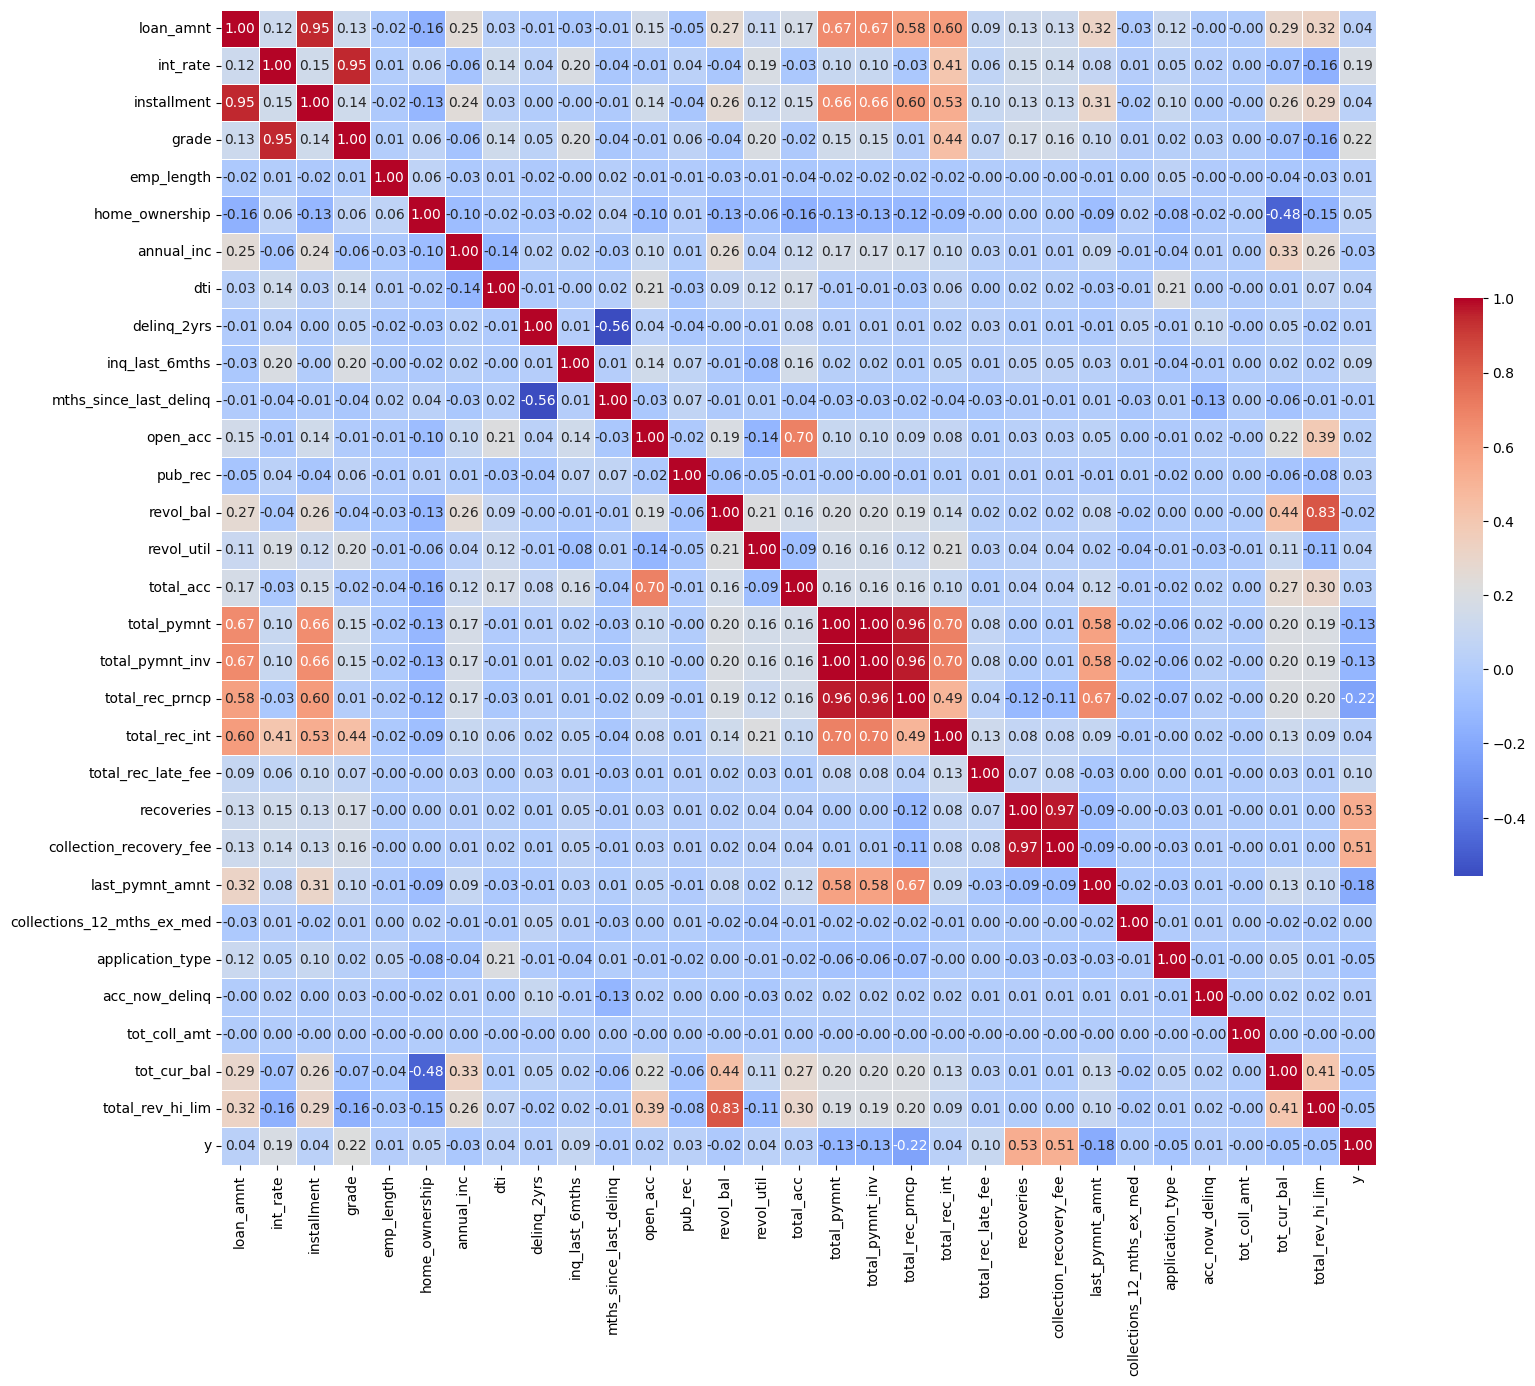

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

train_data = pd.read_csv("/content/drive/MyDrive/trainData.csv")
test_data = pd.read_csv("/content/drive/MyDrive/testData.csv")


# Creating target variable 'y' based on 'loan_status'
train_data['y'] = (train_data['loan_status'] == "Charged Off").astype(int)
test_data['y'] = (test_data['loan_status'] == "Charged Off").astype(int)

# Dropping 'loan_status' column
train_data = train_data.drop(columns=['loan_status'])
test_data = test_data.drop(columns=['loan_status'])

# Preprocessing data: Dropping 'id' and 'member_id' columns
train_data_preprocessed_data = train_data.drop(columns=['id', 'member_id'])
test_data_preprocessed_data = test_data.drop(columns=['id', 'member_id'])

# Dropping rows with missing values
train_data_preprocessed = train_data_preprocessed_data.dropna()
test_data_preprocessed = test_data_preprocessed_data.dropna()

# Encoding categorical variables using Label Encoder
lbl_encoder = LabelEncoder()
categorical_col = ['grade', 'emp_length', 'home_ownership', 'application_type']

# Encoding categorical variables for training data
for column in categorical_col:
    train_data_preprocessed[column] = lbl_encoder.fit_transform(train_data_preprocessed[column])

# Encoding categorical variables for testing data
for column in categorical_col:
    test_data_preprocessed[column] = lbl_encoder.fit_transform(test_data_preprocessed[column])

# Splitting data into features and target for training and testing
X_train = train_data_preprocessed.drop(columns=['y'])
y_train = train_data_preprocessed['y'].values
X_test = test_data_preprocessed.drop(columns=['y'])
y_test = test_data_preprocessed['y'].values

# Correlation Matrix
correlation_matrix = train_data_preprocessed.corr(numeric_only=True)
plt.figure(figsize=(20, 15))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'shrink': .5}, square=True, fmt='.2f', linewidths=.5)
plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Linear Regression

In [4]:
# Linear Regression
# Creating and training the Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

# Making predictions on the training and testing data
y_pred_train_lin_reg = lin_reg_model.predict(X_train)
y_pred_test_lin_reg = lin_reg_model.predict(X_test)

# Calculating Mean Squared Error for training and testing data
mse_train_lin_reg = mean_squared_error(y_train, y_pred_train_lin_reg)
mse_test_lin_reg = mean_squared_error(y_test, y_pred_test_lin_reg)

# Displaying Mean Squared Error for training and testing data
print("Mean Square Error for Linear Regression model on training data is:", mse_train_lin_reg)
print("Mean Square Error for Linear Regression model on testing data is:", mse_test_lin_reg)

Mean Square Error for Linear Regression model on training data is: 0.06850671108774026
Mean Square Error for Linear Regression model on testing data is: 0.0690257733056279


Ridge Regression

In [5]:
# Ridge Regression Model

# Defining range of alpha values for Ridge regression
alphas = np.arange(0.01, 100, 0.01)

# Creating and training Ridge regression model with cross-validation
ridge_reg_model = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_reg_model.fit(X_train, y_train)

# Making predictions on training and testing data
y_pred_train_ridge_reg = ridge_reg_model.predict(X_train)
y_pred_test_ridge_reg = ridge_reg_model.predict(X_test)

# Calculating Mean Squared Error for training and testing data
mse_train_ridge_reg = mean_squared_error(y_train, y_pred_train_ridge_reg)
mse_test_ridge_reg = mean_squared_error(y_test, y_pred_test_ridge_reg)

# Finding the best alpha value selected by RidgeCV
best_alpha_ridge_reg = ridge_reg_model.alpha_

# Displaying Mean Squared Error for training and testing data, and the best alpha Ridge
print("Mean Square Error for Ridge Regression model on training data is:",mse_train_ridge_reg)
print("Mean Square Error for Ridge Regression model on testing data is:",mse_test_ridge_reg)
print("Best alpha Ridge value is:", best_alpha_ridge_reg)

Mean Square Error for Ridge Regression model on training data is: 3.9172651807691405
Mean Square Error for Ridge Regression model on testing data is: 3.825208371448466
Best alpha Ridge value is: 0.08


Lasso Regression

In [2]:
# Lasso Regression Model

# Defining range of alpha values for Lasso regression
alphas = np.arange(0.01, 100, 0.01)

# Creating and training Lasso regression model with cross-validation
lasso_reg_model = LassoCV(alphas=alphas, cv=3)
lasso_reg_model.fit(X_train, y_train)

# Making predictions on training and testing data
y_pred_train_lasso_reg = lasso_reg_model.predict(X_train)
y_pred_test_lasso_reg = lasso_reg_model.predict(X_test)

# Calculating Mean Squared Error for training and testing data
mse_train_lasso_reg = mean_squared_error(y_train, y_pred_train_lasso_reg)
mse_test_lasso_reg = mean_squared_error(y_test, y_pred_test_lasso_reg)

# Finding the best alpha value selected by LassoCV
best_alpha_lasso_reg = lasso_reg_model.alpha_

# Displaying Mean Squared Error for training and testing data, and the best alpha Lasso
print("Mean Square Error for Lasso Regression model on training data is:",mse_train_lasso_reg)
print("Mean Square Error for Lasso Regression model on testing data is:",mse_test_lasso_reg)
print("Best alpha Lasso value is:",best_alpha_lasso_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.506871007361042, tolerance: 0.7121552806850694
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.670263196710039, tolerance: 0.7121552806850694
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.094540009534285, tolerance: 0.7121552806850694
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: Convergenc

Mean Square Error for Lasso Regression model on training data is: 0.06965696872082432
Mean Square Error for Lasso Regression model on testing data is: 0.07019275616862124
Best alpha Lasso value is: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.173e+03, tolerance: 1.062e+00
  model = cd_fast.enet_coordinate_descent(


Random Forest

In [3]:
#Random Forest

# Instantiate the Random Forest with desired parameters
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
random_forest_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train_random_forest = random_forest_model.predict(X_train)
y_pred_test_random_forest = random_forest_model.predict(X_test)

# Calculate the mean squared error for training and test sets
mse_train_random_forest = mean_squared_error(y_train, y_pred_train_random_forest)
mse_test_random_forest = mean_squared_error(y_test, y_pred_test_random_forest)

# Displaying Mean Squared Error for training and testing data
print("Mean Square Error for Random Forest on training data is:",mse_train_random_forest)
print("Mean Square Error for Random Forest on testing data is:",mse_test_random_forest)

Mean Square Error for Random Forest on training data is: 0.00348722545987948
Mean Square Error for Random Forest on testing data is: 0.02609761567071659


Neural Network

In [4]:
# Neural Network Model

# Create and train the neural network model
neural_network_mdl = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', random_state=42)
neural_network_mdl.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train_neural_network = neural_network_mdl.predict(X_train)
y_pred_test_neural_network = neural_network_mdl.predict(X_test)

# Calculate the mean squared error for training and test sets
mse_train_neural_network = mean_squared_error(y_train, y_pred_train_neural_network)
mse_test_neural_network = mean_squared_error(y_test, y_pred_test_neural_network)

# Displaying Mean Squared Error for training and testing data
print("Mean Square Error for Neural Network on training data is:",mse_train_neural_network)
print("Mean Square Error for Neural Network on testing data is:",mse_test_neural_network)

Mean Square Error for Neural Network on training data is: 616021.57835395
Mean Square Error for Neural Network on testing data is: 41099.05548659612


Task 2

In [5]:
# Calculate the correlation matrix
correlation_matrix = train_data_preprocessed.corr()

# Extract the correlations of all features with the target variable 'y'
target_correlation = correlation_matrix['y'].sort_values()

# Display the 10 most positively correlated features with 'y'
print("Top 10 positively correlated features with 'y':")
print(target_correlation.drop('y').tail(10))  # Exclude the last one which is 'y' itself

# Display the 10 most negatively correlated (or least positively correlated) features with 'y'
print("\nTop 10 negatively correlated features with 'y':")
print(target_correlation.head(10))

Top 10 positively correlated features with 'y':
dti                        0.041488
installment                0.041655
revol_util                 0.043281
home_ownership             0.052045
inq_last_6mths             0.089825
total_rec_late_fee         0.101968
int_rate                   0.189353
grade                      0.216675
collection_recovery_fee    0.514246
recoveries                 0.529974
Name: y, dtype: float64

Top 10 negatively correlated features with 'y':
total_rec_prncp          -0.223023
last_pymnt_amnt          -0.181980
total_pymnt_inv          -0.132929
total_pymnt              -0.132924
tot_cur_bal              -0.049853
total_rev_hi_lim         -0.048218
application_type         -0.047288
annual_inc               -0.029821
revol_bal                -0.019584
mths_since_last_delinq   -0.008284
Name: y, dtype: float64
